# **Instituto Tecnológico Vale**

## **Introdução a Visão Computacional**

### **Reconhecimento de imagem**

## **Exemplo prático**

Classificação de textura usando o algoritmo de extração haralick e o algoritmo SVM para classificação.

Documentação do sklearn para algoritmo SVM

[- O que são SVMs](https://scikit-learn.org/stable/modules/svm.html)

[- Linear SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)

In [ ]:
# Instalação da biblioteca mahotas que não é instalada por padrão no colab.
# Ela será necessária pois o algoritmo haralick não está no opencv 

!pip install mahotas

     |████████████████████████████████| 5.7 MB 6.0 MB/s 


In [ ]:
# Imports necessários

from sklearn.svm import LinearSVC
import argparse
import mahotas
import glob
import cv2
import numpy as np

from google.colab.patches import cv2_imshow

In [ ]:
# Baixar os arquivos necessários para a aula
!rm -rf intro_cv_proficam
!git clone https://github.com/h3ct0r/intro_cv_proficam
!cp -r intro_cv_proficam/img img

Cloning into 'intro_cv_proficam'...
remote: Enumerating objects: 149, done.
remote: Counting objects: 100% (149/149), done.
remote: Compressing objects: 100% (135/135), done.
remote: Total 149 (delta 17), reused 142 (delta 12), pack-reused 0
Receiving objects: 100% (149/149), 19.01 MiB | 25.61 MiB/s, done.
Resolving deltas: 100% (17/17), done.


In [ ]:
# Inicializa a matriz de dados e a lista de labels
# Esses serão nosso dados de entrada (X) e a saída (y)

data = []
labels = []

In [ ]:
# Loop sobre o dataset de imagens de treino

for imagePath in glob.glob("img/pratica_textura/training" + "/*.png"):
	# Carrega a imagem, converte em escala de cinza e extrai o nome da textura do nome do arquivo
  image = cv2.imread(imagePath)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  texture = imagePath[imagePath.rfind("/") + 1:].split("_")[0]

	# Extrai as características da textura de Haralick em 4 direções, depois calcula a média de cada direção
  texture_features = mahotas.features.haralick(image)
  features = texture_features.mean(axis=0)

	# Atualiza dados e labels
  data.append(features)
  labels.append(texture)

In [ ]:
# Quantos dados o algoritmo extrai das imagens?

print(np.shape(data))

(16, 13)


In [ ]:
# Quem são os dados?
data

[array([ 8.98029148e-04,  1.08216830e+02,  5.69193299e-01,  1.25611529e+02,
         1.33622258e-01,  2.69523468e+02,  3.94229288e+02,  6.34865970e+00,
         1.07023895e+01,  2.90169374e-04,  4.44433341e+00, -6.18780050e-02,
         6.98943771e-01]),
 array([ 3.87009968e-04,  1.64742164e+02,  7.66679129e-01,  3.53072156e+02,
         1.16536199e-01,  2.92180422e+02,  1.24754646e+03,  7.16884665e+00,
         1.17775088e+01,  1.72298030e-04,  4.71446403e+00, -1.17525137e-01,
         8.70966440e-01]),
 array([ 6.03110376e-04,  1.13347234e+02,  7.28884766e-01,  2.09059669e+02,
         1.24934098e-01,  2.72853323e+02,  7.22891441e+02,  6.75607267e+00,
         1.11124584e+01,  2.80540242e-04,  4.48172316e+00, -1.03399180e-01,
         8.35521906e-01]),
 array([ 1.66209518e-03,  1.10985282e+02,  8.70231593e-01,  4.27736332e+02,
         2.99619901e-01,  3.13974642e+02,  1.59996004e+03,  7.22181352e+00,
         1.08546921e+01,  4.59302468e-04,  4.00552441e+00, -2.65330311e-01,
       

In [ ]:
# E os labels?

labels

['carpet',
 'laminate-flooring',
 'carpet',
 'wallpaper',
 'wallpaper',
 'laminate-flooring',
 'tablecloth',
 'carpet',
 'wallpaper',
 'tablecloth',
 'laminate-flooring',
 'tablecloth',
 'carpet',
 'tablecloth',
 'laminate-flooring',
 'wallpaper']

In [ ]:
# Treinando o Classificador

print ("Criando o modelo...")
model = LinearSVC(C=10.0, random_state=42)

print ("Treinando o modelo...")
model.fit(data, labels)

Criando o modelo...
Treinando o modelo...


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=10.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

Classificando...
 


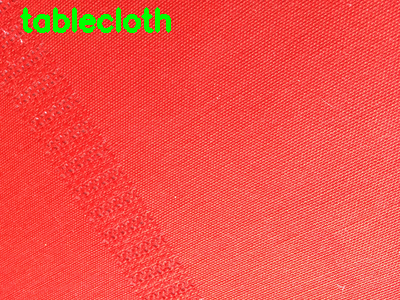

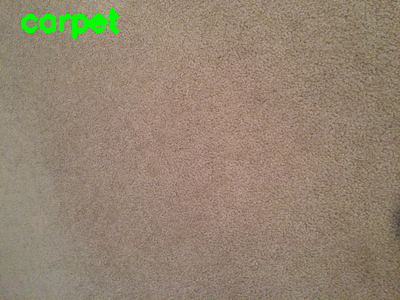

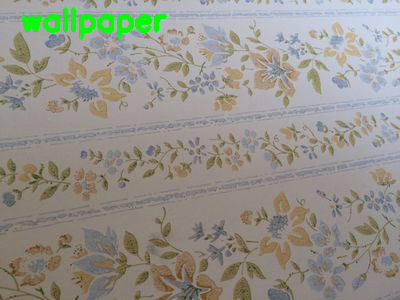

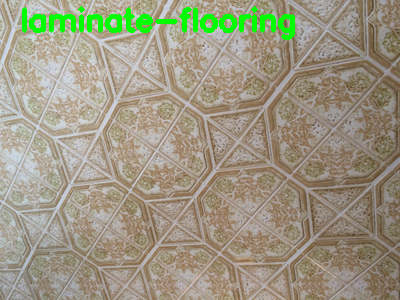

In [ ]:
print ("Classificando...")
print(' ')

# Loop pelas imagens de teste
for imagePath in glob.glob("img/pratica_textura/testing" + "/*.png"):
	# Carrega a imagem, converte em escala de cinza e extrai a textura Haralick da imagem de teste
  image = cv2.imread(imagePath)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  features = mahotas.features.haralick(gray).mean(axis=0)

	# Classifica a imagem de teste
  pred = model.predict(features.reshape(1, -1))[0]
  cv2.putText(image, pred, (20, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 3)

	# Output
  cv2_imshow(image)
  print(' ')
  cv2.waitKey(0)